In [123]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from citipy import citipy
import requests
from config import weather_api_key
from datetime import datetime
import time
from scipy.stats import linregress 

In [60]:
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [61]:
coordinates = list(lat_lngs)
len(coordinates)

1500

In [62]:
cities = []
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name
    
    if city not in cities:
        cities.append(city)
len(cities)

627

In [63]:
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=27fc5fec7dd014ecddc5a56635ea8648


In [64]:
print("Beginning Data Retrieval     ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------


In [65]:
record_count = 1
set_count = 1

In [66]:
city_data = []
print("Beginning Data Retrieval     ")
print("-----------------------------")
record_count = 1
set_count = 1
for i, city in enumerate(cities):

    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1

    city_url = url + "&q=" + cities[i]
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    record_count += 1
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | oranjemund
Processing Record 2 of Set 1 | daru
Processing Record 3 of Set 1 | puerto del rosario
Processing Record 4 of Set 1 | rawah
Processing Record 5 of Set 1 | lasa
Processing Record 6 of Set 1 | omsukchan
Processing Record 7 of Set 1 | ilulissat
Processing Record 8 of Set 1 | barentsburg
City not found. Skipping...
Processing Record 9 of Set 1 | codrington
Processing Record 10 of Set 1 | los llanos de aridane
Processing Record 11 of Set 1 | kyshtovka
Processing Record 12 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 13 of Set 1 | puerto ayora
Processing Record 14 of Set 1 | ushuaia
Processing Record 15 of Set 1 | rikitea
Processing Record 16 of Set 1 | north myrtle beach
Processing Record 17 of Set 1 | rovenki
Processing Record 18 of Set 1 | tuktoyaktuk
Processing Record 19 of Set 1 | san cristobal
Processing Record 20 of Set 1 | albany
Processing Record 21 of Set 1 | f

Processing Record 38 of Set 4 | porto novo
Processing Record 39 of Set 4 | xining
Processing Record 40 of Set 4 | puerto escondido
Processing Record 41 of Set 4 | nizhneyansk
City not found. Skipping...
Processing Record 42 of Set 4 | torbay
Processing Record 43 of Set 4 | port hardy
Processing Record 44 of Set 4 | paamiut
Processing Record 45 of Set 4 | sentyabrskiy
City not found. Skipping...
Processing Record 46 of Set 4 | shitanjing
Processing Record 47 of Set 4 | palabuhanratu
City not found. Skipping...
Processing Record 48 of Set 4 | nara
Processing Record 49 of Set 4 | middelburg
Processing Record 50 of Set 4 | sao filipe
Processing Record 1 of Set 5 | macon
Processing Record 2 of Set 5 | darovskoy
Processing Record 3 of Set 5 | shakiso
Processing Record 4 of Set 5 | muros
Processing Record 5 of Set 5 | zhigansk
Processing Record 6 of Set 5 | gravelbourg
Processing Record 7 of Set 5 | kaitangata
Processing Record 8 of Set 5 | pacifica
Processing Record 9 of Set 5 | praia da vit

Processing Record 28 of Set 8 | mbekenyera
Processing Record 29 of Set 8 | airai
Processing Record 30 of Set 8 | sunndalsora
Processing Record 31 of Set 8 | krasnoturansk
Processing Record 32 of Set 8 | chapleau
Processing Record 33 of Set 8 | lancaster
Processing Record 34 of Set 8 | san patricio
Processing Record 35 of Set 8 | okhotsk
Processing Record 36 of Set 8 | kollam
Processing Record 37 of Set 8 | velingara
Processing Record 38 of Set 8 | constitucion
Processing Record 39 of Set 8 | padang
Processing Record 40 of Set 8 | emerald
Processing Record 41 of Set 8 | elliot lake
Processing Record 42 of Set 8 | kamenskoye
City not found. Skipping...
Processing Record 43 of Set 8 | dospat
Processing Record 44 of Set 8 | cam ranh
Processing Record 45 of Set 8 | ivanivka
Processing Record 46 of Set 8 | tuy hoa
Processing Record 47 of Set 8 | cocula
Processing Record 48 of Set 8 | talaya
Processing Record 49 of Set 8 | tashtyp
Processing Record 50 of Set 8 | tazovskiy
Processing Record 1 

Processing Record 16 of Set 12 | mikhaylovka
Processing Record 17 of Set 12 | nakamura
Processing Record 18 of Set 12 | damavand
Processing Record 19 of Set 12 | cayenne
Processing Record 20 of Set 12 | ormara
Processing Record 21 of Set 12 | kahama
Processing Record 22 of Set 12 | kavieng
Processing Record 23 of Set 12 | monroe
Processing Record 24 of Set 12 | vaitupu
City not found. Skipping...
Processing Record 25 of Set 12 | las conchas
Processing Record 26 of Set 12 | mayahi
Processing Record 27 of Set 12 | parker
Processing Record 28 of Set 12 | touho
Processing Record 29 of Set 12 | warmbad
Processing Record 30 of Set 12 | balaguer
Processing Record 31 of Set 12 | preston
Processing Record 32 of Set 12 | hohhot
Processing Record 33 of Set 12 | solnechnyy
Processing Record 34 of Set 12 | evensk
Processing Record 35 of Set 12 | acarau
Processing Record 36 of Set 12 | artyk
City not found. Skipping...
Processing Record 37 of Set 12 | fayaoue
Processing Record 38 of Set 12 | buchana

In [67]:
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Oranjemund,-28.5500,16.4333,72.84,59,7,10.60,NA,2021-04-08 11:33:10
1,Daru,-9.0763,143.2092,76.33,91,99,9.13,PG,2021-04-08 11:33:11
2,Puerto Del Rosario,28.5004,-13.8627,68.00,73,20,8.05,ES,2021-04-08 11:33:11
3,Rawah,34.4816,41.9093,90.07,12,100,11.41,IQ,2021-04-08 11:33:12
4,Lasa,46.6166,10.7002,52.00,38,0,4.61,IT,2021-04-08 11:33:12
5,Omsukchan,62.5333,155.8000,-9.06,99,12,4.09,RU,2021-04-08 11:33:12
6,Ilulissat,69.2167,-51.1000,28.40,59,75,8.05,GL,2021-04-08 11:33:13
7,Codrington,-38.2667,141.9667,60.55,92,100,15.23,AU,2021-04-08 11:33:13
8,Los Llanos De Aridane,28.6585,-17.9182,73.40,73,20,6.91,ES,2021-04-08 11:33:13
9,Kyshtovka,56.5550,76.6271,35.22,94,95,6.11,RU,2021-04-08 11:33:14


In [68]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Oranjemund,NA,2021-04-08 11:33:10,-28.5500,16.4333,72.84,59,7,10.60
1,Daru,PG,2021-04-08 11:33:11,-9.0763,143.2092,76.33,91,99,9.13
2,Puerto Del Rosario,ES,2021-04-08 11:33:11,28.5004,-13.8627,68.00,73,20,8.05
3,Rawah,IQ,2021-04-08 11:33:12,34.4816,41.9093,90.07,12,100,11.41
4,Lasa,IT,2021-04-08 11:33:12,46.6166,10.7002,52.00,38,0,4.61


In [69]:
output_data_file = "weather_data/cities.csv"
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [70]:
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [71]:
today = time.strftime("%x")
today

'04/08/21'

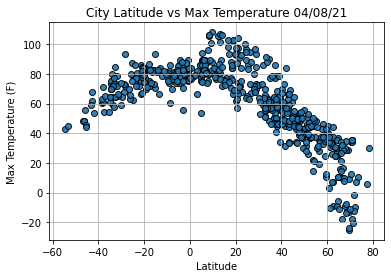

In [72]:
plt.scatter(lats,
           max_temps,
           edgecolor="black", linewidths=1, marker="o",
           alpha=0.9, label="Cities")

plt.title(f"City Latitude vs Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)
plt.savefig("weather_data/Fig1.png")
plt.show()

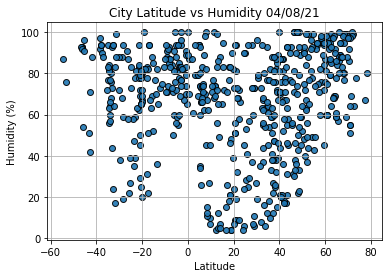

In [73]:
plt.scatter(lats,
           humidity,
           edgecolor="black", linewidths=1, marker="o",
           alpha=0.9, label="Cities")

plt.title(f"City Latitude vs Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
plt.savefig("weather_data/Fig2.png")
plt.show()

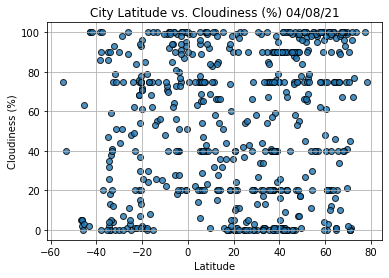

In [74]:
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
plt.savefig("weather_data/Fig3.png")
plt.show()

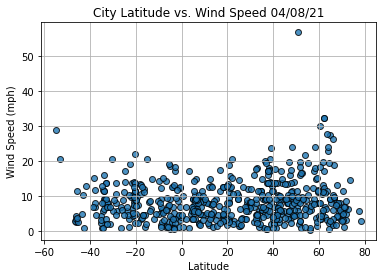

In [75]:
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
plt.savefig("weather_data/Fig4.png")
plt.show()

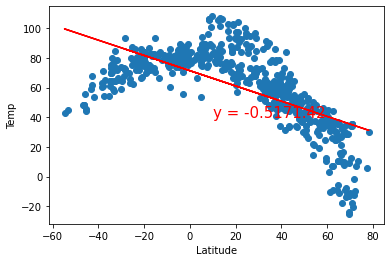

In [76]:
(slope, intercept, r_value, p_value, std_err) = linregress(lats, max_temps)
line_eq = "y = " + str(round(slope,2)) + str(round(intercept,2))
regress_values = lats * slope + intercept
plt.plot(lats,regress_values, "r")
plt.scatter(lats, max_temps)
plt.annotate(line_eq, (10,40), fontsize=15, color="red")
plt.xlabel('Latitude')
plt.ylabel('Temp')
plt.show()

In [100]:
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x " + str(round(intercept,2))
    plt.scatter(x_values, y_values)
    plt.plot(x_values, regress_values, "r")
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.title(title)
    plt.show
    

In [79]:
index13 = city_data_df.loc[13]
index13

City           North Myrtle Beach
Country                        US
Date          2021-04-08 11:31:48
Lat                        33.816
Lng                        -78.68
Max Temp                       64
Humidity                       63
Cloudiness                      1
Wind Speed                   5.75
Name: 13, dtype: object

In [80]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
2,Puerto Del Rosario,ES,2021-04-08 11:33:11,28.5004,-13.8627,68.00,73,20,8.05
3,Rawah,IQ,2021-04-08 11:33:12,34.4816,41.9093,90.07,12,100,11.41
4,Lasa,IT,2021-04-08 11:33:12,46.6166,10.7002,52.00,38,0,4.61
5,Omsukchan,RU,2021-04-08 11:33:12,62.5333,155.8000,-9.06,99,12,4.09
6,Ilulissat,GL,2021-04-08 11:33:13,69.2167,-51.1000,28.40,59,75,8.05


In [82]:
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] <= 0)]

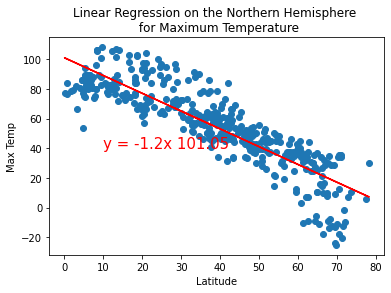

In [111]:
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
plot_linear_regression(x_values, y_values, 'Linear Regression on the Northern Hemisphere \n for Maximum Temperature', 'Max Temp', (10,40))

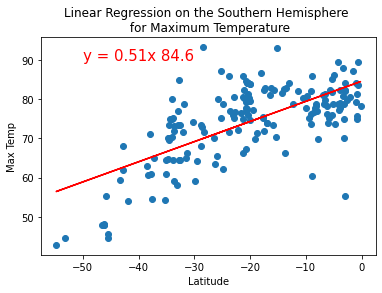

In [110]:
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
plot_linear_regression(x_values, y_values, 'Linear Regression on the Southern Hemisphere \n for Maximum Temperature', 'Max Temp', (-50,90))

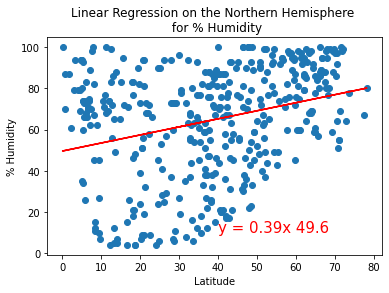

In [109]:
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for % Humidity', '% Humidity',(40,10))

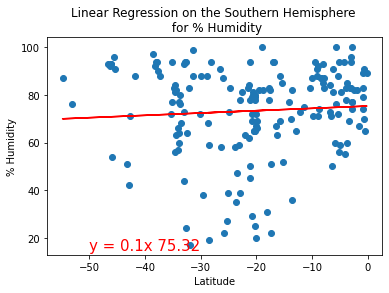

In [108]:
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for % Humidity', '% Humidity',(-50,15))

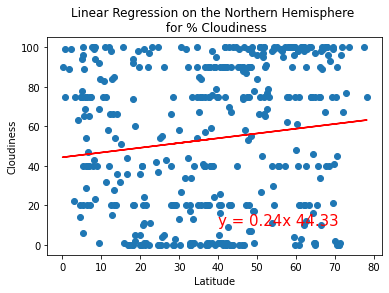

In [112]:
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for % Cloudiness', 'Cloudiness',(40,10))

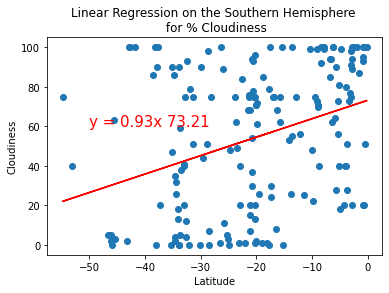

In [115]:
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for % Cloudiness', 'Cloudiness',(-50,60))

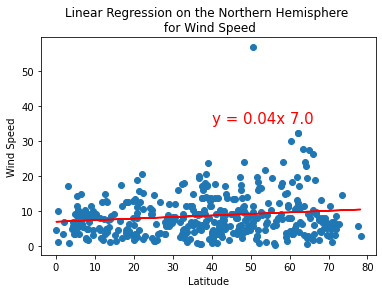

In [117]:
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for Wind Speed', 'Wind Speed',(40,35))

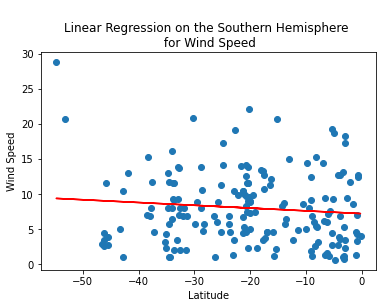

In [118]:
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for Wind Speed', 'Wind Speed',(-50,35))